In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import data_preprocessing
import nn_helpers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torchinfo import summary

In [7]:
main_df = data_preprocessing.get_data('GOOG')

In [8]:
main_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2796,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600
2797,2023-02-14,94.660004,95.175003,92.650002,94.949997,94.949997,42513100
2798,2023-02-15,94.739998,97.339996,94.360001,97.099998,97.099998,37029900
2799,2023-02-16,95.540001,97.879997,94.970001,95.779999,95.779999,35642100


In [23]:
data_seq = np.array(main_df['Close'].tolist()).reshape(-1, 1)
scaler = MinMaxScaler()
data_seq = scaler.fit_transform(data_seq)
data_seq = data_seq.reshape(-1, 1)
seq_len = 10

train_iter, test_iter = data_preprocessing.prepare_data(data_seq, seq_len, 0.8, 16)

In [11]:
num_epochs = 40

hists_lstm = pd.DataFrame()
losses_lstm = {}

for num_hiddens in [50, 70, 100, 120, 140, 150, 200, 250, 300, 400]:
  for lr in [0.001, 0.0008, 0.0005]:
    # for num_out_layers in [None, [100], [150, 50]]:
    for num_out_layers in [None, [num_hiddens]]:
      net_str = f'{num_hiddens}-{lr}-{num_out_layers}'
      print(f'started for {net_str}')
      net = nn_helpers.RNNModel(seq_len, num_hiddens, 2, recur_ctor=nn.LSTM, num_hidden_neutrons=num_out_layers)
      trainer = torch.optim.Adam(net.parameters(), lr=lr)
      loss = nn.MSELoss()
      train_hist, test_hist = nn_helpers.train_model(net, train_iter, test_iter, loss, trainer, num_epochs)
      losses_lstm[net_str] = {}
      losses_lstm[net_str]['train'] = train_hist
      losses_lstm[net_str]['test'] = test_hist
      new_row = pd.DataFrame({'num hiddens': [num_hiddens], 'lr': [lr], 'out layers': [str(num_out_layers)], 'best train': [min(train_hist)], 'best test': [min(test_hist)]})
      hists_lstm = pd.concat([hists_lstm, new_row], ignore_index=True)
      torch.save(net.state_dict(), f'models/lstm/{net_str}.pt')
      
hists_lstm.to_csv('models/lstm/hists.csv')
torch.save(losses_lstm, 'models/lstm/losses.bin')

started for 50-0.001-None
started epoch 1/20
	batch 20/141 loss: 0.0002478563994600336
	batch 40/141 loss: 0.00013936718580112028
	batch 60/141 loss: 9.850938154916851e-05
	batch 80/141 loss: 0.0008378156461219533
	batch 100/141 loss: 0.0009175862778965893
	batch 120/141 loss: 0.001198687607601793
	batch 140/141 loss: 0.001269223089882741
epoch 1/20, train loss: 0.0013046211092970993, test loss: 0.014376623786758616
started epoch 2/20
	batch 20/141 loss: 0.009186644259125387
	batch 40/141 loss: 0.004971638830352276
	batch 60/141 loss: 0.003322227979318389
	batch 80/141 loss: 0.0036628901840572324
	batch 100/141 loss: 0.0032450879723637627
	batch 120/141 loss: 0.003167452986878061
	batch 140/141 loss: 0.0028979132410102337
epoch 2/20, train loss: 0.0029428492471116757, test loss: 0.01036940945175905
started epoch 3/20
	batch 20/141 loss: 0.007801955939004302
	batch 40/141 loss: 0.0041177850912987425
	batch 60/141 loss: 0.002777511226192549
	batch 80/141 loss: 0.003553425472007632
	batch

KeyboardInterrupt: 

In [ ]:
num_epochs = 40

hists_gru = pd.DataFrame()
losses_gru = {}

for num_hiddens in [50, 70, 100, 120, 140, 150, 200, 250, 300, 400]:
  for lr in [0.001, 0.0008, 0.0005]:
    # for num_out_layers in [None, [100], [150, 50]]:
    for num_out_layers in [None, [num_hiddens]]:
      net_str = f'{num_hiddens}-{lr}-{num_out_layers}'
      print(f'started for {net_str}')
      net = nn_helpers.RNNModel(seq_len, num_hiddens, 2, recur_ctor=nn.LSTM, num_hidden_neutrons=num_out_layers)
      trainer = torch.optim.Adam(net.parameters(), lr=lr)
      loss = nn.MSELoss()
      train_hist, test_hist = nn_helpers.train_model(net, train_iter, test_iter, loss, trainer, num_epochs)
      losses_gru[net_str] = {}
      losses_gru[net_str]['train'] = train_hist
      losses_gru[net_str]['test'] = test_hist
      new_row = pd.DataFrame({'num hiddens': [num_hiddens], 'lr': [lr], 'out layers': [str(num_out_layers)], 'best train': [min(train_hist)], 'best test': [min(test_hist)]})
      hists_gru = pd.concat([hists_gru, new_row], ignore_index=True)
      torch.save(net.state_dict(), f'models/gru/{net_str}.pt')
      
hists_gru.to_csv('models/gru/hists.csv')
torch.save(losses_gru, 'models/gru/losses.bin')

In [36]:
hists_lstm = pd.read_csv('models/cut/lstm/hists.csv')
hists_gru = pd.read_csv('models/cut/gru/hists.csv')

losses_lstm = torch.load('models/cut/lstm/losses.bin')
losses_gru = torch.load('models/cut/gru/losses.bin')

In [42]:
hists_gru.sort_values('best test', ascending=True).head()

,num hiddens,lr,out layers,best train,best test
50,300,0.0008,None,0.000316,0.000281
36,200,0.0010,None,0.000332,0.000285
42,250,0.0010,None,0.000373,0.000288
44,250,0.0008,None,0.000380,0.000294
56,400,0.0008,None,0.000467,0.000307


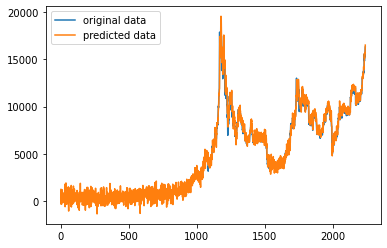

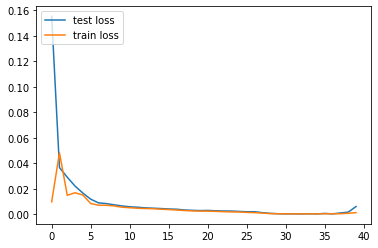

In [44]:
net_str = '300-0.0008-None'

best_net = nn_helpers.RNNModel(seq_len, 300, 2, num_hidden_neutrons=None, recur_ctor=nn.GRU)
best_net.load_state_dict(torch.load(f'models/cut/gru/{net_str}.pt', map_location=torch.device('cpu')))

y_pred = best_net(X_test)
y_test_inv = scaler.inverse_transform(y_test.detach().numpy())
y_pred_inv = scaler.inverse_transform(y_pred.detach().numpy())

plt.plot(y_test_inv, label='original data')
plt.plot(y_pred_inv, label='predicted data')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/best-cut-gru.png', format='png')
plt.show()

test_loss = losses_gru[net_str]['test']
train_loss = losses_gru[net_str]['train']

plt.plot(test_loss, label='test loss')
plt.plot(train_loss, label='train loss')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/best-cut-gru-hist.png', format='png')

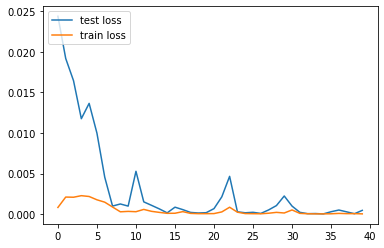

In [35]:
test_loss = losses_gru['250-0.001-[250]']['test']
train_loss = losses_gru['250-0.001-[250]']['train']

plt.plot(test_loss, label='test loss')
plt.plot(train_loss, label='train loss')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/best-gru-hist.png', format='png')

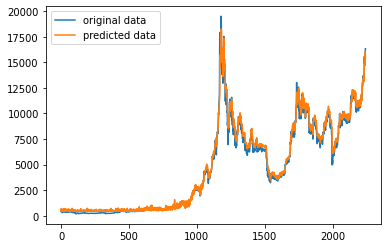

In [28]:
best_net = nn_helpers.RNNModel(seq_len, 140, 2, num_hidden_neutrons=[140], recur_ctor=nn.LSTM)
best_net.load_state_dict(torch.load('models/lstm/140-0.0005-[140].pt', map_location=torch.device('cpu')))
X_test, y_test = test_iter.dataset.tensors

y_pred = best_net(X_test)
y_test_inv = scaler.inverse_transform(y_test.detach().numpy())
y_pred_inv = scaler.inverse_transform(y_pred.detach().numpy())

plt.plot(y_test_inv, label='original data')
plt.plot(y_pred_inv, label='predicted data')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/best-lstm.png', format='png')

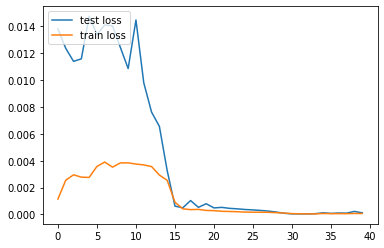

In [29]:
test_loss = losses_lstm['140-0.0005-[140]']['test']
train_loss = losses_lstm['140-0.0005-[140]']['train']

plt.plot(test_loss, label='test loss')
plt.plot(train_loss, label='train loss')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/best-lstm-hist.png', format='png')

In [5]:
lstm_net = nn_helpers.RNNModel(seq_len, 200, 2, recur_ctor=nn.LSTM)

trainer = torch.optim.Adam(lstm_net.parameters(), lr=0.001)
loss = nn.MSELoss()

train_hist, test_hist = nn_helpers.train_model(lstm_net, train_iter, test_iter, loss, trainer, 40)

started epoch 1/40
	batch 20/141 loss: 0.0004931462593049218
	batch 40/141 loss: 0.00025545941384592653
	batch 60/141 loss: 0.00017321479405059867
	batch 80/141 loss: 0.0008639164025645129
	batch 100/141 loss: 0.0008564894226918795
	batch 120/141 loss: 0.0013288845164704337
	batch 140/141 loss: 0.0012478985393089813
epoch 1/40, train loss: 0.0012501514071059576, test loss: 0.025152468791310775
started epoch 2/40
	batch 20/141 loss: 0.008223769297525507
	batch 40/141 loss: 0.004145290027533832
	batch 60/141 loss: 0.0027695797192767674
	batch 80/141 loss: 0.0029070093598857483
	batch 100/141 loss: 0.0027539805741329817
	batch 120/141 loss: 0.002984303042879096
	batch 140/141 loss: 0.002818073312705849
epoch 2/40, train loss: 0.0028503417463660746, test loss: 0.014585136063071834
started epoch 3/40
	batch 20/141 loss: 0.008017823902764575
	batch 40/141 loss: 0.004104498348283414
	batch 60/141 loss: 0.002738905068970136
	batch 80/141 loss: 0.0034439335699339322
	batch 100/141 loss: 0.00295

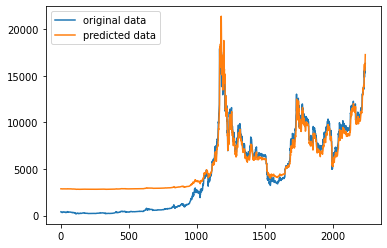

In [15]:
X_test, y_test = test_iter.dataset.tensors

y_pred = lstm_net(X_test)
y_test_inv = scaler.inverse_transform(y_test.detach().numpy())
y_pred_inv = scaler.inverse_transform(y_pred.detach().numpy())

plt.plot(y_test_inv, label='original data')
plt.plot(y_pred_inv, label='predicted data')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/lstm-allrange-200.png', format='png')

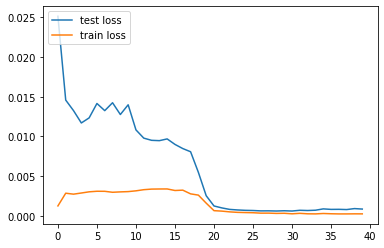

In [9]:
plt.plot(test_hist, label='test loss')
plt.plot(train_hist, label='train loss')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/lstm-allrange-200-hist.png', format='png')

In [10]:
gru_net = nn_helpers.RNNModel(seq_len, 200, 2, recur_ctor=nn.GRU)

trainer = torch.optim.Adam(gru_net.parameters(), lr=0.001)
loss = nn.MSELoss()

train_hist, test_hist = nn_helpers.train_model(gru_net, train_iter, test_iter, loss, trainer, 40)

started epoch 1/40
	batch 20/141 loss: 0.0029836722948402895
	batch 40/141 loss: 0.001560883939782798
	batch 60/141 loss: 0.0010515225299059239
	batch 80/141 loss: 0.0015829177667683325
	batch 100/141 loss: 0.001455196114534374
	batch 120/141 loss: 0.0017079790237517045
	batch 140/141 loss: 0.0015792103998104982
epoch 1/40, train loss: 0.001592002463759003, test loss: 0.020361625071134457
started epoch 2/40
	batch 20/141 loss: 0.0054332283228177404
	batch 40/141 loss: 0.002761337268583475
	batch 60/141 loss: 0.0018429926790683264
	batch 80/141 loss: 0.0023183582327931163
	batch 100/141 loss: 0.0022667579193193887
	batch 120/141 loss: 0.002707174474657374
	batch 140/141 loss: 0.00246162424220334
epoch 2/40, train loss: 0.002451298865130637, test loss: 0.02490296279796868
started epoch 3/40
	batch 20/141 loss: 0.007386158528265696
	batch 40/141 loss: 0.0037368527754850335
	batch 60/141 loss: 0.0024963403998924604
	batch 80/141 loss: 0.002956661241684344
	batch 100/141 loss: 0.00283918821

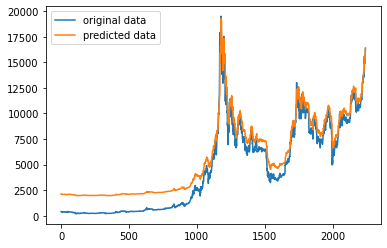

In [16]:
y_pred = gru_net(X_test)
y_test_inv = scaler.inverse_transform(y_test.detach().numpy())
y_pred_inv = scaler.inverse_transform(y_pred.detach().numpy())

plt.plot(y_test_inv, label='original data')
plt.plot(y_pred_inv, label='predicted data')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/gru-allrange-200.png', format='png')

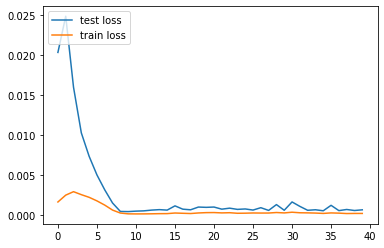

In [17]:
plt.plot(test_hist, label='test loss')
plt.plot(train_hist, label='train loss')
plt.legend(loc='upper left')
plt.savefig('illustrations/experiments/gru-allrange-200-hist.png', format='png')

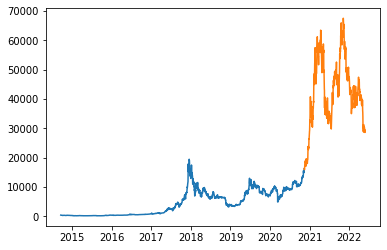

In [19]:
split_perc = 0.8
train_len = int(len(main_df) * split_perc)

train_df = main_df[:train_len]
test_df = main_df[train_len:]

plt.plot(train_df['Date'], train_df['Close'], label='train seq')
plt.plot(test_df['Date'], test_df['Close'], label='test seq')
plt.savefig('illustrations/btc-train_test_split.png', format='png')

In [29]:
min(train_hist)

9.467996144378294e-05